In [1]:
%run ../../common/import_all.py

from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

# The perceptron

The perceptron is (one of?) the very first algorithms for artificial neural networks, it was developed in 1957 at a [Cornell lab](https://en.wikipedia.org/wiki/Calspan) funded by the US Navy, by Rosenblatt, a psychologist who was a pioneer in the field of Artificial Intelligence, and [published](#rosenblatt). It was immediately advertised with lots of fanfare and great expectations (the NY Times at that time published [an article](#nyt), boldly describing it as a machine which could think and learn on its own), and then the interest in it declined due to the unfeasability of many tasks it was supposed to tackle. Interest in it, and in Artificial Intelligence in general declined gradually, leading to what is known as the "AI winter". In fact, Minsky and Papert in 1969 published a [seminal book](#minskypapert) that proved the perceptron wasn't as powerful as it was supposed to be. Have a look a [this article](#article) for a nice outline of the history of this algorithm.

We put the perceptron in this chapter, instead of in the chapter about the types of networks, because it is such an important topic that it is essential to understand the choice of activation functions and learning. Also, the perceptron furnishes the basis for understanding how artificial neurons work in a general sense. 

## How it works

<figure style="float:left;">
  <img src="../../imgs/perceptron.png" width="400" align="left" style="margin:20px 50px"/>
  <figcaption>Image from [the book by M Nielsen](#book), which inspired most of the writing here.</figcaption>
</figure>

The way a perceptron works is rather simple, yet quite ingenious. You have the representation of a neuron as per figure, where a series of binary input values $(x_1, x_2, \ldots, x_n)$ come in and an output is out. Inputs can be weighted differently, so that weights $(w_1, w_2, \ldots, w_n)$ are given. The output will depend on inputs and weights, the inputs being the values which determine a decision, the weights the how important each value is.  

The neuron is equipped with a threshold value $t$, or alternatively a bias value $b=-t$, such that the output $o$ is given by the activation

$$
f = \begin{cases}
0 \ \text{ if } \ w \cdot x + b \leq 0\\
1 \ \text{ if } \ w \cdot x + b > 0
\end{cases}
$$

which is to say that the neuron "fires" when the dot product of input and weights plus its bias pass 0 (or alternatively when the dot product of weights and inputs passes threshold), a representation of what happens to real neurons when stimulated and producing electrical activity. The bias values makes things such that the larger it is, the easier it will be for the neuron to fire. 

So the perceptron is pretty much an artificial neuron with activation function given by the Heaviside step function, displayed in the following chart.

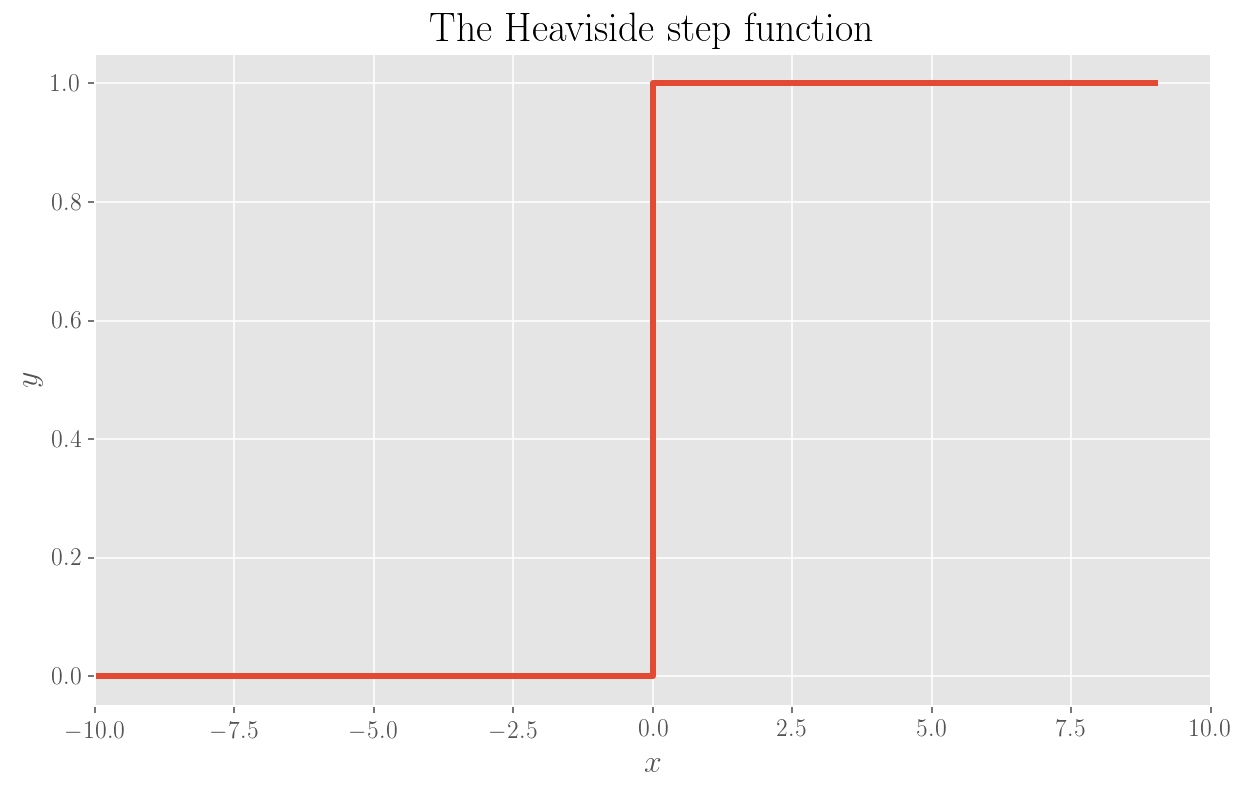

In [3]:
x = np.arange(-10, 10, 1)
y = []
for item in x:
    value = 0 if item <= 0 else 1
    y.append(value)

plt.step(x, y)
plt.xlim(-10, 10)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('The Heaviside step function')
plt.show();

### An example: a NAND gate

You can represent a NAND gate with a perceptron. A NAND gate has truth table ($X$ and $Y$ being the inputs, $o$ the output):

| X         | Y           | o      |
| :-------: |:-----------:| :-----:|
| 0         | 0 | 1 |
| 0         | 1 | 1 |
| 1         | 0 | 1 |
| 1         | 1 | 0 |

You can quickly obtain it with a perceptron, for example (again from [Nielsen's book](#1)) with weights $w_1=w_2=-2$ and bias $b=3$. I've done it in [this repo](#3).

## Learning

The perceptron is an ingenious mechanism, but rather difficult to use for learning in a typical case. Due to the activation function being a step, a small modification to the input will produce a jump in the output, making it rather clunky to tune for a general problems. You can use it for learning things, but you have to painstakingly work on the features you inject, this [video](#coursera) from a course by G Hinton is worth a watch. More interesting activations are indeed used these days, you can find a discussion on the activations page in this section.

However, let's not give the impression that the perceptron is useless. It still an awesome idea, and good enough for some applications. This [page on Applied Go](https://appliedgo.net/perceptron/) gives a very nice introduction to it and its use in a binary classification task (with Go code!).  

## Multilayer Perceptron and pint of salt

A multilayer perceptron (MLP) is a term used for a network with 3 layers and a feedforward architecture. The activations used in the neurons are not necessarily Heaviside as for the perceptron neuron, and this creates a bit of confusion! Consult [Wikipedia](https://en.wikipedia.org/wiki/Multilayer_perceptron). 

## References

1. <a name="rosenblatt"></a> F Rosenblatt, **Principles of neurodynamics, perceptrons and the theory of brain mechanisms**, No. VG-1196-G-8. *Cornell Aeronautical Lab*, 1961
2. <a name="nyt"></a> [**New Navy device learns by doing; Psychologist Shows Embryo of Computer Designed to Read and Grow Wiser**](http://www.nytimes.com/1958/07/08/archives/new-navy-device-learns-by-doing-psychologist-shows-embryo-of.htm), *New York Times*, July 1958
3. <a name="article"></a> D Hernandez, [**The thinking computer that was supposed to colonize space**](http://fusion.net/story/54904/thinking-computer-perceptron/?curator=MediaREDEF), 2015
4. <a name="minskypapert"></a> M Minsky, S Papert, **Perceptrons**, 1969 
5. <a name="book"></a> M Nielsen, [**Neural Networks and Deep Learning**](http://neuralnetworksanddeeplearning.com/chap1.html#perceptrons), 2017
6. <a name="coursera"></a> [**What perceptrons can't do**](https://www.coursera.org/learn/neural-networks/lecture/SUTuA/what-perceptrons-can-t-do-15-min), on Coursera, video from lectures by G Hinton, University of Toronto 
7. <a name="go"></a> [**Perceptron: the most basic form of a neural network**](https://appliedgo.net/perceptron/), Applied Go